In [1]:
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
import torch.utils.data.dataloader as dataloader
import torch.nn as nn
import torch.optim as optim


In [2]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
train_loader = dataloader.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = dataloader.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [3]:
train_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [4]:
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x12180d330>,
 <torch.utils.data.dataloader.DataLoader at 0x121903070>)

In [5]:
train_dataset[0], test_dataset[0]

((tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0

In [6]:
it = iter(train_loader) ## 可转成迭代器
next(it)

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [7]:
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(64*5*5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 64*5*5)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

net = MNISTNet()
device = torch.device('mps')
net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

loss_history = []
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if (epoch+1) % 10 == 0:
        loss_history.append(running_loss)
        print(f"epoch: {epoch+1}, loss: {running_loss:.4f}")


epoch: 10, loss: 28.1582
epoch: 20, loss: 13.0052
epoch: 30, loss: 9.0699
epoch: 40, loss: 6.7615
epoch: 50, loss: 5.7867
epoch: 60, loss: 3.9715
epoch: 70, loss: 4.8846
epoch: 80, loss: 5.2836
epoch: 90, loss: 4.9282
epoch: 100, loss: 3.6846


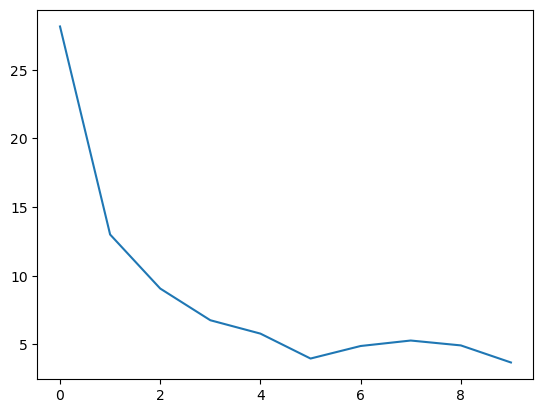

In [8]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(loss_history)
plt.show()

In [9]:
net.eval()
net.to(device)
corr_count = 0
for i, data in enumerate(test_loader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    outputs = torch.argmax(outputs, dim=1)
    corr_count += (outputs == labels).sum()

print(f"accuracy: {corr_count*100/len(test_dataset):.2f}%")


accuracy: 99.29%


In [10]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.out = nn.Linear(32*7*7, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output

In [11]:
type(test_dataset.data), test_dataset.data.shape, test_dataset.data.size(0)

(torch.Tensor, torch.Size([10000, 28, 28]), 10000)

In [12]:
cnn = CNN()
optimizer = optim.Adam(cnn.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
cnn.train()
cnn.to(device)
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        pred = cnn(inputs)
        optimizer.zero_grad()
        loss = criterion(pred, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"epoch: {epoch+1}, loss: {running_loss:.4f}")


epoch: 1, loss: 187.4024
epoch: 2, loss: 54.7194
epoch: 3, loss: 38.5517
epoch: 4, loss: 30.3778
epoch: 5, loss: 24.8354
epoch: 6, loss: 21.5436
epoch: 7, loss: 18.1742
epoch: 8, loss: 14.4349
epoch: 9, loss: 12.6197
epoch: 10, loss: 10.5862
epoch: 11, loss: 9.5792
epoch: 12, loss: 7.5280
epoch: 13, loss: 7.4939
epoch: 14, loss: 5.5689
epoch: 15, loss: 6.0503
epoch: 16, loss: 5.5465
epoch: 17, loss: 2.6881
epoch: 18, loss: 4.0507
epoch: 19, loss: 4.8936
epoch: 20, loss: 2.7935


In [13]:
cnn.eval()
cnn.to(device)
corr_count = 0
for i, data in enumerate(test_loader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = cnn(inputs)
    outputs = torch.argmax(outputs, dim=1)
    corr_count += (outputs == labels).sum()

print(f"accuracy: {corr_count*100/len(test_dataset):.2f}%")


accuracy: 99.09%


In [14]:
def accuracy(output, labels):
    pred = torch.argmax(output, dim=1)
    ok = (pred == labels).sum()
    return ok, len(labels)
